In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# Basis Encoding
This example illustrates a couple of disadvantages of basis encoding. While it is simple to understand, the state vectors can become quite sparse, and schemes to implement it are usually not efficient.

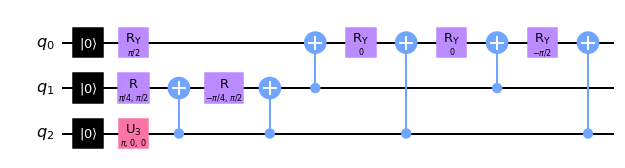

In [2]:
import math

desired_state = [
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(2),
    0,
    1 / math.sqrt(2)]

qc = QuantumCircuit(3)
qc.initialize(desired_state, [0,1,2])

qc.decompose().decompose().decompose().decompose().decompose().draw()

# Amplitude Encoding
The advantage of amplitude encoding is that it only requires log_2(NM) qubits to encode. However, subsequent algorithms must operate on the amplitudes of a quantum state, and methods to prepare and measure the quantum states tend not to be efficient.

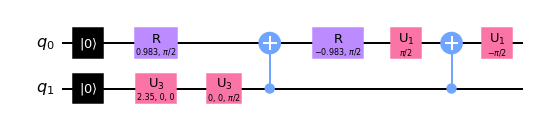

In [3]:
desired_state = [
    1 / math.sqrt(15.25) * 1.5,
    0,
    1 / math.sqrt(15.25) * -2,
    1 / math.sqrt(15.25) * 3]

qc = QuantumCircuit(2)
qc.initialize(desired_state, [0,1])

qc.decompose().decompose().decompose().decompose().decompose().draw()

# Angle Encoding
This is different from the previous two encoding methods, as it only encodes one datapoint at a time, rather than a whole dataset. It does however, only use  qubits and a constant depth quantum circuit, making it amenable to current quantum hardware.

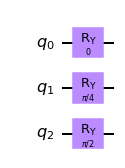

In [6]:
qc = QuantumCircuit(3)

qc.ry(0, 0)
qc.ry(math.pi/4, 1)
qc.ry(math.pi/2, 2)
qc.draw()

# Constant Depth Arbitrary Encoding

Like angle encoding, it only encodes one datapoint at a time, rather than a whole dataset. It also uses a constant depth quantum circuit and  qubits, meaning it can be run on current quantum hardware.

## ZZFeatureMap
The Qiskit ZZFeatureMap circuit with 3 qubits, only encodes a datapoint of 3 features, despite having 6 parameterized gates:

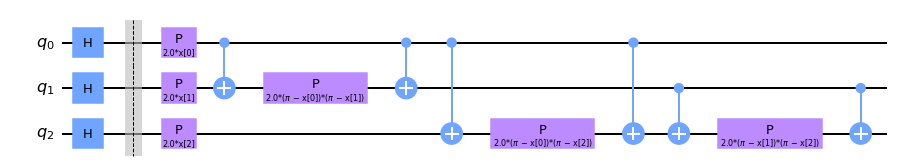

In [8]:
from qiskit.circuit.library import ZZFeatureMap

circuit = ZZFeatureMap(3, reps=1, insert_barriers=True)
circuit.decompose().draw()

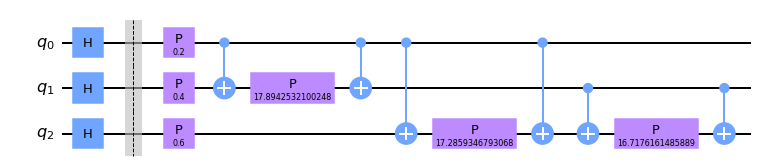

In [9]:
x = [0.1, 0.2, 0.3]

encode = circuit.bind_parameters(x)
encode.decompose().draw()

## EfficientSU2
Qiskit EfficientSU2 circuit to encode 12 features, would only use 3 qubits:

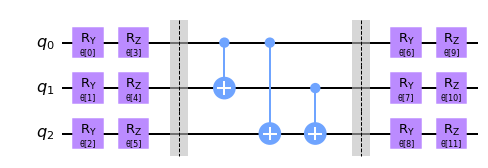

In [10]:
from qiskit.circuit.library import EfficientSU2

circuit = EfficientSU2(num_qubits=3, reps=1, insert_barriers=True)
circuit.decompose().draw()

The datapoint x with 12 features, using each of the parameterized gates to encode a different feature.

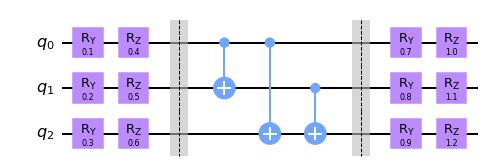

In [12]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]

encode = circuit.bind_parameters(x)
encode.decompose().draw()